<a href="https://colab.research.google.com/github/music-ai-644/AI_Study_2022/blob/main/Quiz/week2_2_sjj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제 1 정답지 

## 과제 해결을 위한 아이리스 데이터 셋
1. 데이터셋 불러오기 

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
print(iris.data.shape, iris.target.shape)

(150, 4) (150,)


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
sepal_length = iris.data[:, 0]
sepal_width = iris.data[:, 1]
petal_length = iris.data[:, 2]
petal_width = iris.data[:, 3]

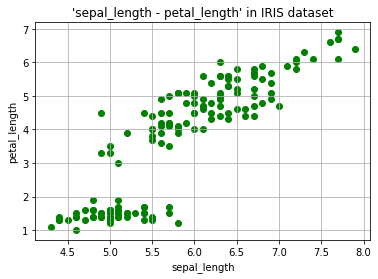

In [6]:
import matplotlib.pyplot as plt

plt.scatter(sepal_length, petal_length, marker="o", color='g')
plt.grid()
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.title("'sepal_length - petal_length' in IRIS dataset")
plt.show()

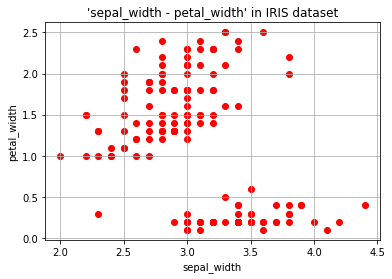

In [7]:
plt.scatter(sepal_width, petal_width, marker="o", color='r')
plt.grid()
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.title("'sepal_width - petal_width' in IRIS dataset")
plt.show()

2. 오차 역전파를 이용한 가중치 절편 업데이트 

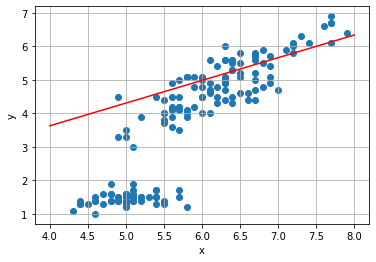

In [8]:
# 초기값 
w = 1
b = 1

x = sepal_length 
y = petal_length

for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i 
  w = w + w_rate * err * 0.001
  b = b + 1 * err * 0.001

plt.scatter(x, y)
pt1 = (4.0, 4.0 * w + b)
pt2 = (8.0, 8.0 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

1.6022297063949384 -5.115823831821715


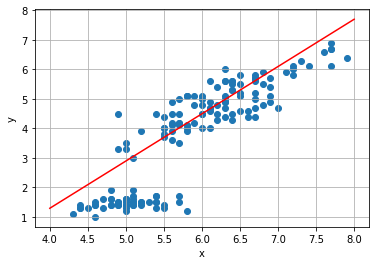

In [9]:
# 여러 에포크를 반복하기
w = 1
b = 1

x = sepal_length 
y = petal_length

for i in range(1000):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i 
    w = w + w_rate * err * 0.001
    b = b + 1 * err * 0.001

print(w, b)
plt.scatter(x, y)
pt1 = (4.0, 4.0 * w + b)
pt2 = (8.0, 8.0 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()



In [13]:
class Pearl:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err * 0.001   # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err * 0.001   # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=1000):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = y_i - y_hat      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w += w_grad          # 가중치 업데이트
                self.b += b_grad          # 절편 업데이트



In [11]:
x=sepal_length 
y=petal_length


pearl_1 = Pearl()
pearl_1.fit(x, y)

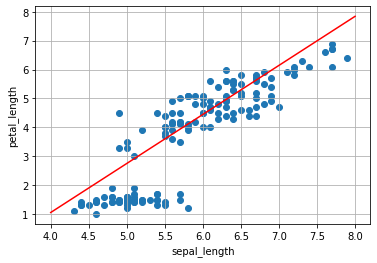

1.6022297063949384 -5.115823831821715


In [12]:
plt.scatter(x, y)

pt1 = (4, pearl_1.w * 4 + pearl_1.b)
pt2 = (8, pearl_1.w * 8 + pearl_1.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.grid()
plt.show()

print(w,b)